In [21]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:

titanic_df = sns.load_dataset('titanic')
titanic_df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [29]:
datos_numericos = titanic_df.select_dtypes(include=[float, int])


In [31]:

maximos = datos_numericos.max()
maximos

survived      1.0000
pclass        3.0000
age          80.0000
sibsp         8.0000
parch         6.0000
fare        512.3292
dtype: float64

In [32]:

minimos = datos_numericos.min()
minimos


survived    0.00
pclass      1.00
age         0.42
sibsp       0.00
parch       0.00
fare        0.00
dtype: float64

In [33]:
rangos = maximos - minimos
rangos


survived      1.0000
pclass        2.0000
age          79.5800
sibsp         8.0000
parch         6.0000
fare        512.3292
dtype: float64

In [37]:
stds = datos_numericos.std()
stds

survived     0.486592
pclass       0.836071
age         14.526497
sibsp        1.102743
parch        0.806057
fare        49.693429
dtype: float64

In [38]:
promedios = datos_numericos.mean()
promedios

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [39]:
q1  = promedios - stds
q1

survived    -0.102754
pclass       1.472571
age         15.172620
sibsp       -0.579736
parch       -0.424464
fare       -17.489221
dtype: float64

In [40]:
q3 = promedios + stds
q3

survived     0.870431
pclass       3.144713
age         44.225615
sibsp        1.625751
parch        1.187651
fare        81.897637
dtype: float64

In [41]:
q1 = datos_numericos.quantile(0.25,numeric_only=True)
q3 = datos_numericos.quantile(0.75,numeric_only=True)
print(q1)
print(q3)

survived     0.0000
pclass       2.0000
age         20.1250
sibsp        0.0000
parch        0.0000
fare         7.9104
Name: 0.25, dtype: float64
survived     1.0
pclass       3.0
age         38.0
sibsp        1.0
parch        0.0
fare        31.0
Name: 0.75, dtype: float64


In [42]:
(
    datos_numericos
    .quantile(q=[0.25,0.50,0.75],numeric_only=True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

variable     0.25      0.5  0.75      iqr
0  survived   0.0000   0.0000   1.0   1.0000
1    pclass   2.0000   3.0000   3.0   1.0000
2       age  20.1250  28.0000  38.0  17.8750
3     sibsp   0.0000   0.0000   1.0   1.0000
4     parch   0.0000   0.0000   0.0   0.0000
5      fare   7.9104  14.4542  31.0  23.0896

In [43]:

datos_numericos.fare.std()
datos_numericos.fare.quantile(0.50)

14.4542

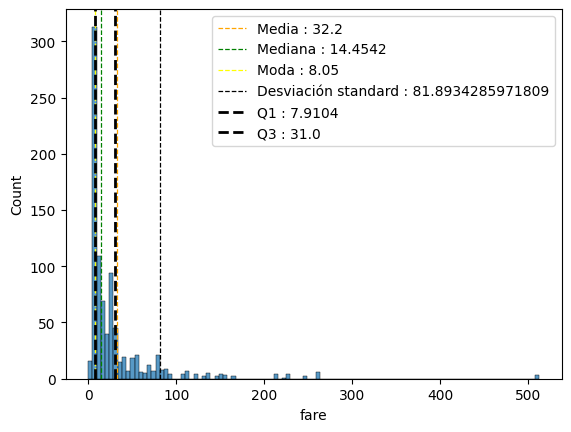

In [48]:
sns.histplot(
    data=datos_numericos,
    x='fare'
)

fare_mean = round(datos_numericos.fare.mean(),2)
fare_median = datos_numericos.fare.median()
fare_mode = datos_numericos.fare.mode()[0]
fare_std = fare_mean + datos_numericos.fare.std()
fare_q1 = datos_numericos.fare.quantile(0.25)
fare_q3 = datos_numericos.fare.quantile(0.75)

#GRAFICAMOS LA MEDIA
plt.axvline(
    x=fare_mean,
    color='orange',
    linestyle='dashed',
    label=f'Media : {fare_mean}',
    linewidth=0.9
)
plt.axvline(
    x=fare_median,
    color='green',
    linestyle='dashed',
    label=f'Mediana : {fare_median}',
    linewidth=0.9
)
plt.axvline(
    x=fare_mode,
    color='yellow',
    linestyle='dashed',
    label=f'Moda : {fare_mode}',
    linewidth=0.9
)
#std
plt.axvline(
    x=fare_std,
    color='black',
    linestyle='dashed',
    label=f'Desviación standard : {fare_std}',
    linewidth=0.9
)
#q1
plt.axvline(
    x=fare_q1,
    color='black',
    linestyle='dashed',
    label=f'Q1 : {fare_q1}',
    linewidth=2
)
#q3
plt.axvline(
    x=fare_q3,
    color='black',
    linestyle='dashed',
    label=f'Q3 : {fare_q3}',
    linewidth=2
)

plt.legend()
plt.show()